In [1]:
#東京証券取引所から銘柄一覧データを取得する
#https://www.jpx.co.jp/markets/statistics-equities/misc/01.html

import pandas as pd

tse_list = pd.read_excel('data_j.xls', header=0)

In [2]:
tse_list

,日付,コード,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
0,20211130,1301,極洋,市場第一部（内国株）,50,水産・農林業,1,食品,7,TOPIX Small 2
1,20211130,1305,ダイワ上場投信－トピックス,ETF・ETN,-,-,-,-,-,-
2,20211130,1306,ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ連動型上場投信,ETF・ETN,-,-,-,-,-,-
3,20211130,1308,上場インデックスファンドＴＯＰＩＸ,ETF・ETN,-,-,-,-,-,-
4,20211130,1309,ＮＥＸＴ ＦＵＮＤＳ ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信,ETF・ETN,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
4132,20211130,9993,ヤマザワ,市場第一部（内国株）,6100,小売業,14,小売,7,TOPIX Small 2
4133,20211130,9994,やまや,市場第一部（内国株）,6100,小売業,14,小売,7,TOPIX Small 2
4134,20211130,9995,グローセル,市場第一部（内国株）,6050,卸売業,13,商社・卸売,7,TOPIX Small 2
4135,20211130,9996,サトー商会,JASDAQ(スタンダード・内国株）,6050,卸売業,13,商社・卸売,-,-


In [3]:
tse1 = tse_list[tse_list['市場・商品区分'] == '市場第一部（内国株）']
tse1

,日付,コード,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
0,20211130,1301,極洋,市場第一部（内国株）,50,水産・農林業,1,食品,7,TOPIX Small 2
19,20211130,1332,日本水産,市場第一部（内国株）,50,水産・農林業,1,食品,4,TOPIX Mid400
20,20211130,1333,マルハニチロ,市場第一部（内国株）,50,水産・農林業,1,食品,4,TOPIX Mid400
26,20211130,1352,ホウスイ,市場第一部（内国株）,6050,卸売業,13,商社・卸売,7,TOPIX Small 2
37,20211130,1375,雪国まいたけ,市場第一部（内国株）,50,水産・農林業,1,食品,6,TOPIX Small 1
...,...,...,...,...,...,...,...,...,...,...
4131,20211130,9991,ジェコス,市場第一部（内国株）,6050,卸売業,13,商社・卸売,7,TOPIX Small 2
4132,20211130,9993,ヤマザワ,市場第一部（内国株）,6100,小売業,14,小売,7,TOPIX Small 2
4133,20211130,9994,やまや,市場第一部（内国株）,6100,小売業,14,小売,7,TOPIX Small 2
4134,20211130,9995,グローセル,市場第一部（内国株）,6050,卸売業,13,商社・卸売,7,TOPIX Small 2


In [4]:
# TOPIX500の銘柄を抽出する

# '市場・商品区分'列のデータが”市場第一部（内国株）”だけの行を選択する
tse1 = tse_list[tse_list['市場・商品区分'] == '市場第一部（内国株）']

# ”規模区分”列が"core30 Large70 Mid400”の行だけを選択する
topix500 = tse1[(tse1['規模区分'] == 'TOPIX Core30') | #パイプライン
                (tse1['規模区分'] == 'TOPIX Large70') |
                (tse1['規模区分'] == 'TOPIX Mid400')]

topix500

,日付,コード,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
19,20211130,1332,日本水産,市場第一部（内国株）,50,水産・農林業,1,食品,4,TOPIX Mid400
20,20211130,1333,マルハニチロ,市場第一部（内国株）,50,水産・農林業,1,食品,4,TOPIX Mid400
63,20211130,1414,ショーボンドホールディングス,市場第一部（内国株）,2050,建設業,3,建設・資材,4,TOPIX Mid400
64,20211130,1417,ミライト・ホールディングス,市場第一部（内国株）,2050,建設業,3,建設・資材,4,TOPIX Mid400
166,20211130,1605,ＩＮＰＥＸ,市場第一部（内国株）,1050,鉱業,2,エネルギー資源,4,TOPIX Mid400
...,...,...,...,...,...,...,...,...,...,...
4111,20211130,9962,ミスミグループ本社,市場第一部（内国株）,6050,卸売業,13,商社・卸売,4,TOPIX Mid400
4125,20211130,9983,ファーストリテイリング,市場第一部（内国株）,6100,小売業,14,小売,2,TOPIX Large70
4126,20211130,9984,ソフトバンクグループ,市場第一部（内国株）,5250,情報・通信業,10,情報通信・サービスその他,1,TOPIX Core30
4128,20211130,9987,スズケン,市場第一部（内国株）,6050,卸売業,13,商社・卸売,4,TOPIX Mid400


In [5]:
# 33業種コード,33業種区分ごとの銘柄数を算出
#特定の値がいくつあるか数えるとき、groupby() してから size()
category_count = topix500.groupby(['33業種コード','33業種区分']).size()
print(category_count)

33業種コード  33業種区分    
50       水産・農林業         2
1050     鉱業             1
2050     建設業           20
3050     食料品           28
3100     繊維製品           5
3150     パルプ・紙          4
3200     化学            44
3250     医薬品           21
3300     石油・石炭製品        3
3350     ゴム製品           4
3400     ガラス・土石製品       8
3450     鉄鋼             7
3500     非鉄金属           7
3550     金属製品           6
3600     機械            32
3650     電気機器          51
3700     輸送用機器         19
3750     精密機器          10
3800     その他製品         10
4050     電気・ガス業        13
5050     陸運業           25
5100     海運業            3
5150     空運業            2
5200     倉庫・運輸関連業       2
5250     情報・通信業        38
6050     卸売業           23
6100     小売業           32
7050     銀行業           23
7100     証券、商品先物取引業     4
7150     保険業            6
7200     その他金融業         8
8050     不動産業          12
9050     サービス業         27
dtype: int64


In [6]:
# 33業種コード,33業種区分を抽出
#グループ化して辞書型で表示する。
industry_category = topix500.groupby(['33業種コード','33業種区分']).groups.keys()
print(industry_category)

dict_keys([(50, '水産・農林業'), (1050, '鉱業'), (2050, '建設業'), (3050, '食料品'), (3100, '繊維製品'), (3150, 'パルプ・紙'), (3200, '化学'), (3250, '医薬品'), (3300, '石油・石炭製品'), (3350, 'ゴム製品'), (3400, 'ガラス・土石製品'), (3450, '鉄鋼'), (3500, '非鉄金属'), (3550, '金属製品'), (3600, '機械'), (3650, '電気機器'), (3700, '輸送用機器'), (3750, '精密機器'), (3800, 'その他製品'), (4050, '電気・ガス業'), (5050, '陸運業'), (5100, '海運業'), (5150, '空運業'), (5200, '倉庫・運輸関連業'), (5250, '情報・通信業'), (6050, '卸売業'), (6100, '小売業'), (7050, '銀行業'), (7100, '証券、商品先物取引業'), (7150, '保険業'), (7200, 'その他金融業'), (8050, '不動産業'), (9050, 'サービス業')])


In [7]:
import datetime
from datetime import date,timedelta

In [8]:
!pip install pandas-datareader
import pandas_datareader.data as web

In [9]:
# 2020/11/2〜2021/2/5の株価を取得する
base_date = datetime.datetime(2020, 1, 6)
end_date=datetime.datetime(2021, 2, 5)

# 業種単位の株価上昇率格納用のDataFrameを用意する
category_df = None

# 業種ごとに変動率を計算する
for category in industry_category:

    category_code = category[0]     # 33業種コード
    category_class = category[1]    # 33業種区分

    # 指定した業種の銘柄を抽出
    brands = topix500[topix500['33業種区分'] == category_class]

    # 銘柄コードの末尾に.JPを付加する
    symbols = []
    for code in brands['コード']:
        symbols.append('{0:d}.JP'.format(code))

    # 指定銘柄コードの株価を取得する
    stock_price = web.DataReader(symbols, 'stooq', start=base_date, end=end_date)
    #display(stock_price)
    # 銘柄ごとに上昇率を計算し、ディショクナリに格納する
    # 銘柄ごとに上昇率を計算し、ディショクナリに格納する
    dict = {}
    for symbol in symbols:

        # 基準日付からの上昇率を計算する
        base_date_str = base_date.strftime('%04Y-%02m-%02d')
        try:
            base_price = stock_price.loc[base_date_str][('Close',symbol)]
        except KeyError: # Because of 5076.JP is not Found.
            continue

        try:
            base_price = base_price.iloc[0]
        except AttributeError: # if type(base_price) is numpy.float64
            base_price = base_price

        increase_rate = stock_price[('Close',symbol)] / base_price
        # ディクショナリに格納する
        dict[symbol] = increase_rate

    # ディクショナリからDataFrame作成
    df = pd.DataFrame(dict)
    # 業種内銘柄の上昇率の平均値を計算する
    mean = df.mean(axis='columns')
    std = df.std(axis='columns')

    # DataFrameに業種単位の上昇率と、上昇率の標準偏差を格納する
    if category_df is None:
        category_df = pd.concat([mean, std], axis=1)
        category_df.columns = pd.MultiIndex.from_tuples(
            [(category_class, '上昇率'), (category_class, '標準偏差')])
    else:
        category_df[(category_class, '上昇率')] = mean
        category_df[(category_class, '標準偏差')] = std

    print(category_df)


              水産・農林業          
                 上昇率      標準偏差
Date                          
2021-02-05  0.861171  0.089868
2021-02-04  0.818361  0.123146
2021-02-03  0.819174  0.121996
2021-02-02  0.801386  0.122021
2021-02-01  0.800120  0.117930
...              ...       ...
2020-01-10  1.010497  0.019328
2020-01-09  1.010967  0.015510
2020-01-08  0.996758  0.015623
2020-01-07  1.017510  0.006783
2020-01-06  1.000000  0.000000

[266 rows x 2 columns]
              水産・農林業                  鉱業     
                 上昇率      標準偏差       上昇率 標準偏差
Date                                         
2021-02-05  0.861171  0.089868  0.579011  NaN
2021-02-04  0.818361  0.123146  0.563934  NaN
2021-02-03  0.819174  0.121996  0.556846  NaN
2021-02-02  0.801386  0.122021  0.541768  NaN
2021-02-01  0.800120  0.117930  0.532897  NaN
...              ...       ...       ...  ...
2020-01-10  1.010497  0.019328  0.989012  NaN
2020-01-09  1.010967  0.015510  0.976331  NaN
2020-01-08  0.996758  0.015623  1.00

In [15]:
pd = category_df
pd
pd.to_excel("category_data.xlsx")

In [36]:
import pandas as pd

category_df = pd.read_excel("category_data.xlsx", header=[0, 1, 2])

In [37]:
category_df

Unnamed: 0_level_0  ...               サービス業
    Unnamed: 0_level_1  ...                標準偏差
                  Date  ... Unnamed: 66_level_2
0           2021-02-05  ...            0.525246
1           2021-02-04  ...            0.523441
2           2021-02-03  ...            0.538247
3           2021-02-02  ...            0.547852
4           2021-02-01  ...            0.533524
..                 ...  ...                 ...
261         2020-01-10  ...            0.021118
262         2020-01-09  ...            0.016850
263         2020-01-08  ...            0.009705
264         2020-01-07  ...            0.009877
265         2020-01-06  ...            0.000000

[266 rows x 67 columns]

In [39]:
category_df.dtypes

Unnamed: 0_level_0  Unnamed: 0_level_1  Date                   datetime64[ns]
水産・農林業              上昇率                 Unnamed: 1_level_2            float64
                    標準偏差                Unnamed: 2_level_2            float64
鉱業                  上昇率                 Unnamed: 3_level_2            float64
                    標準偏差                Unnamed: 4_level_2            float64
                                                                    ...      
その他金融業              標準偏差                Unnamed: 62_level_2           float64
不動産業                上昇率                 Unnamed: 63_level_2           float64
                    標準偏差                Unnamed: 64_level_2           float64
サービス業               上昇率                 Unnamed: 65_level_2           float64
                    標準偏差                Unnamed: 66_level_2           float64
Length: 67, dtype: object

In [42]:
category_df.columns

MultiIndex([('Unnamed: 0_level_0', 'Unnamed: 0_level_1', ...),
            (            '水産・農林業',                '上昇率', ...),
            (            '水産・農林業',               '標準偏差', ...),
            (                '鉱業',                '上昇率', ...),
            (                '鉱業',               '標準偏差', ...),
            (               '建設業',                '上昇率', ...),
            (               '建設業',               '標準偏差', ...),
            (               '食料品',                '上昇率', ...),
            (               '食料品',               '標準偏差', ...),
            (              '繊維製品',                '上昇率', ...),
            (              '繊維製品',               '標準偏差', ...),
            (             'パルプ・紙',                '上昇率', ...),
            (             'パルプ・紙',               '標準偏差', ...),
            (                '化学',                '上昇率', ...),
            (                '化学',               '標準偏差', ...),
            (               '医薬品',                '上昇率'

# 各銘柄の上昇率を計算

# 折れ線グラフで株価上昇率を可視化

In [24]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.4 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=f0725a58a78644443f3de22e272272cc352a6bbc01b23bd6b38d1da5f6fbab04
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import japanize_matplotlib

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact per

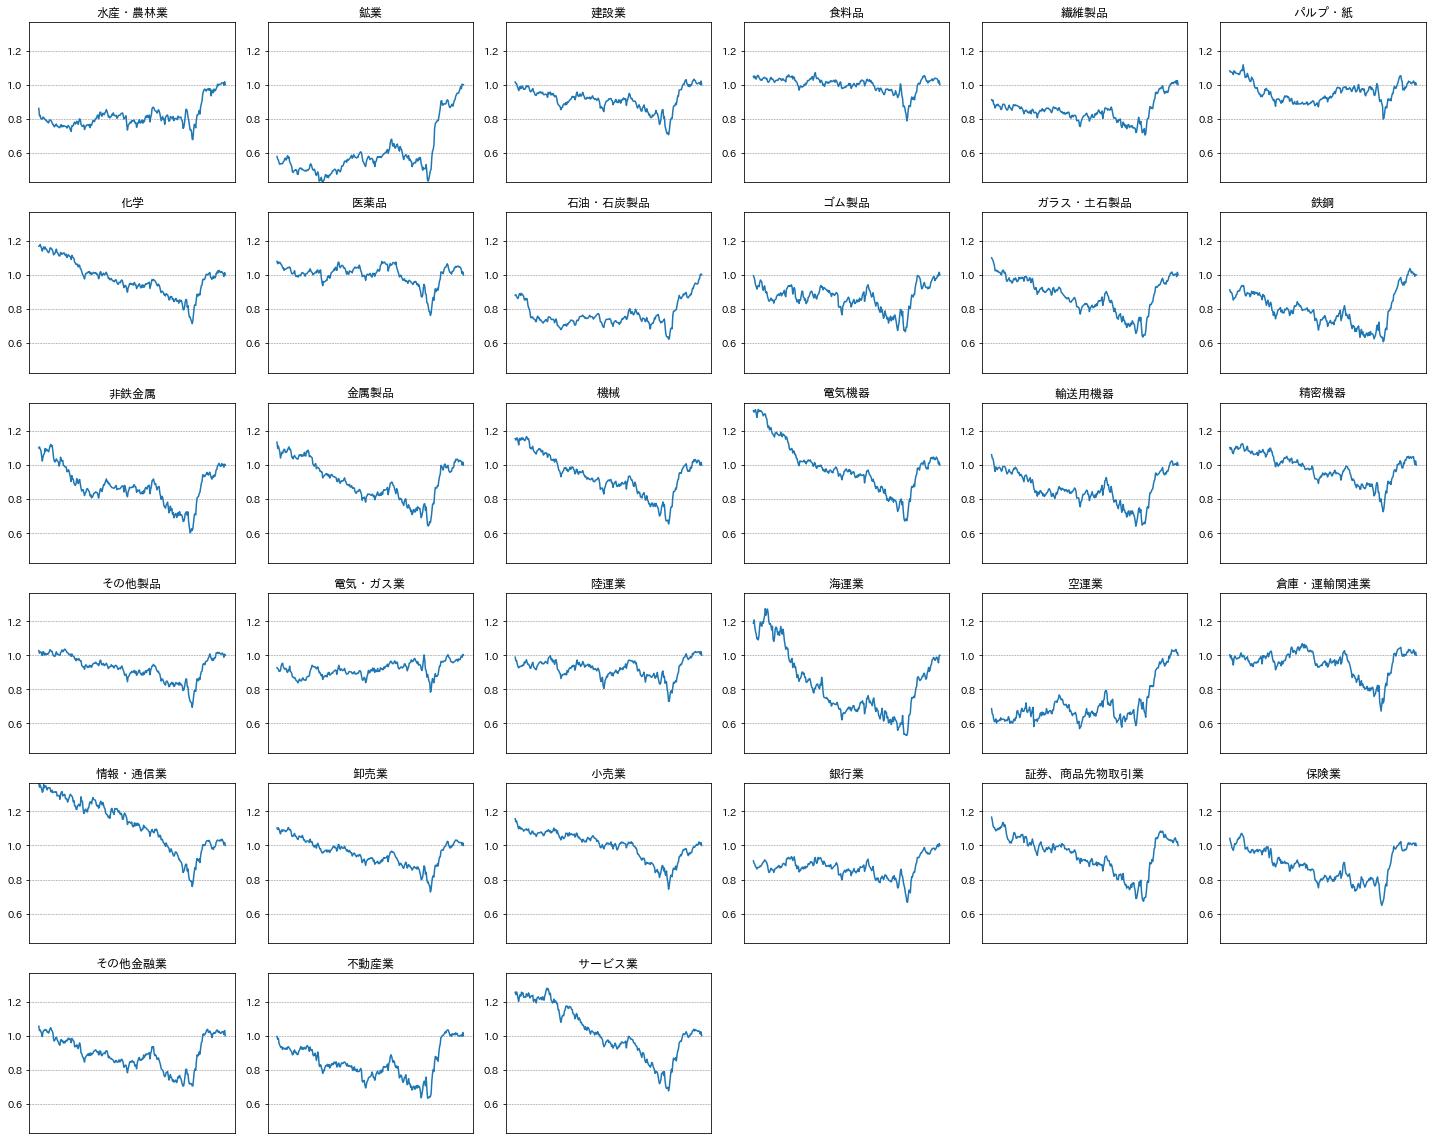

In [40]:
# 上昇率のみを抽出し、業種の数を取得する
increase_rate_df = category_df.loc[:, pd.IndexSlice[:, '上昇率']]
industry_num = len(increase_rate_df.columns)

# rows, colsを決定し、Figureを取得
rows, cols = (6, 6)
fig = plt.figure(figsize=(20, 16))

# 上昇率の最大値と最小値を取得
min_y = increase_rate_df.min().min()
max_y = increase_rate_df.max().max()

# 業種ごとに折れ線グラフを表示する
for i in range(industry_num):
    
    # Axesを取得
    ax = fig.add_subplot(rows, cols, i+1)
    
    # 銘柄名
    category_name = increase_rate_df.columns[i][0]
    
    # 上昇率を取得
    increate_rate = increase_rate_df.loc[:, pd.IndexSlice[category_name, '上昇率']]
    
    # 折れ線グラフを表示
    x = increase_rate_df.index
    y = increate_rate
    ax.plot(x, y, label=category_name)
    
    # 目盛り線を表示
    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    
    # X軸の目盛り位置を設定
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    
    # Y軸の範囲を設定
    ax.set_ylim(min_y, max_y) 
    
    # グラフのタイトルを追加
    ax.set_title(category_name)
    
# 不要な余白を削る
plt.tight_layout()

# グラフを表示
fig.show()

# 棒グラフで株価上昇率を可視化

In [41]:
# 最新日付を取得する
latest_date = category_df.index.max()
latest_date_str = latest_date.strftime('%04Y-%02m-%02d')

# 最新日付の上昇率, 標準偏差を抽出する
increase_rate = category_df.loc[latest_date_str, pd.IndexSlice[:, '上昇率']]
std = category_df.loc[latest_date_str, pd.IndexSlice[:, '標準偏差']]

# 業種名をリストで取得
categories= [col[0] for col in increase_rate.columns]

# 上昇率と標準偏差を列にもつDataFrameを作成し、上昇率で降順ソートする
df = pd.DataFrame({'上昇率': increase_rate.values[0], '標準偏差': std.values[0]}, 
                    index=categories)
df = df.sort_values('上昇率', ascending=False)
print(df)

AttributeError: ignored

In [ ]:
import numpy as np

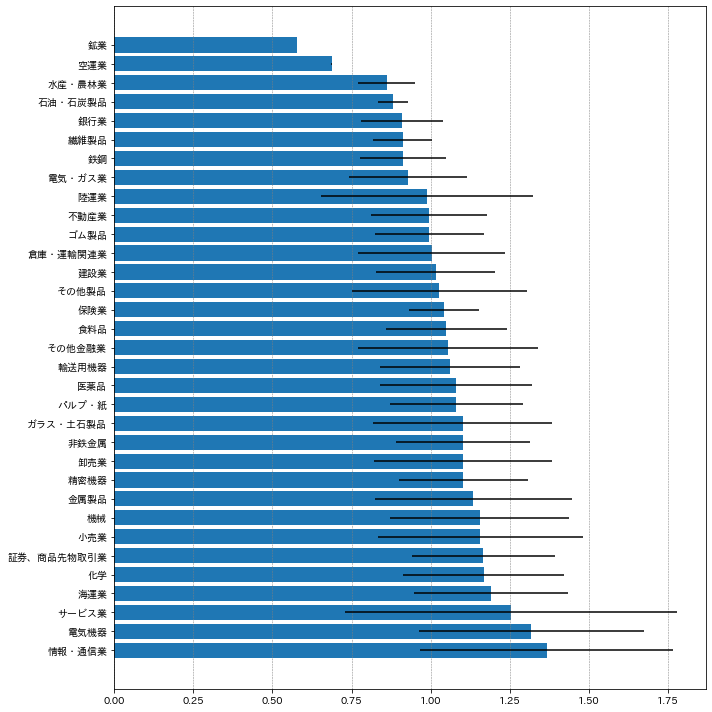

In [ ]:
# 図と座標軸を取得
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

# 棒グラフに表示するデータを準備
x = np.arange(len(categories))
y = df['上昇率']
yerr = df['標準偏差']
label = df.index

# 棒グラフ表示
ax.barh(x, y, xerr=yerr, tick_label=label)

# 目盛り線を表示
ax.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)

# 不要な余白を削る
plt.tight_layout()

# グラフを表示
fig.show()

# TOPIX500銘柄の銘柄ごとの株価上昇率を算出

In [ ]:
# 33業種コード,33業種区分を抽出
industry_category = topix500.groupby(['33業種コード','33業種区分']).groups.keys()

# 銘柄単位の株価上昇率格納用のディクショナリを用意する
brand_dict = {}
brand_count = 0

# 業種ごとに変動率を計算する
for category in industry_category:
    
    category_code = category[0]     # 33業種コード
    category_class = category[1]    # 33業種区分
    
    # 指定した業種の銘柄を抽出
    brands = topix500[topix500['33業種区分'] == category_class]
    
    # 銘柄コードの末尾に.JPを付加する
    symbols = []
    for code in brands['コード']:
        symbols.append('{0:d}.JP'.format(code))
        
    # 指定銘柄コードの株価を取得する
    stock_price = web.DataReader(symbols, 'stooq', start=base_date)
    
    # 銘柄ごとに上昇率を計算し、ディショクナリに格納する   
    dict = {}
    for symbol in symbols:

        # 基準日付からの上昇率を計算する
        base_date_str = base_date.strftime('%04Y-%02m-%02d')
        try:
            base_price = stock_price.loc[base_date_str][('Close',symbol)]
        except KeyError: # Because of 5076.JP is not Found.
            continue

        try:
            base_price = base_price.iloc[0]
        except AttributeError: # if type(base_price) is numpy.float64
            base_price = base_price

        increase_rate = stock_price[('Close',symbol)] / base_price
        # ディクショナリに格納する
        dict[symbol] = increase_rate
    # ディクショナリからDataFrame作成
    df = pd.DataFrame(dict)
    
    # 最新日付を取得する
    latest_date = stock_price.index.max()
    latest_date_str = latest_date.strftime('%04Y-%02m-%02d')
    
    # 銘柄単位の株価上昇率をディクショナリに格納する
    for i, symbol in enumerate(symbols):
        
        code = brands['コード'].iloc[i]
        name = brands['銘柄名'].iloc[i]
        increase_rate = df.loc[latest_date_str, symbol].iloc[0]
        
        # '33業種コード','33業種区分', 'コード', '銘柄名', '上昇率'])
        brand_dict[brand_count] = [category_code, category_class, code, name, increase_rate]
        brand_count += 1
        
# 銘柄単位の株価上昇率を格納したDataFrameを作成する
brand_df = pd.DataFrame.from_dict(
    brand_dict, orient="index", 
    columns=['33業種コード','33業種区分', 'コード', '銘柄名', '上昇率'])

AttributeError: ignored